In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

## Importing cleaned Dataset - 'FK_Friday_Fixed_Heading.csv'

In [2]:
#Dataset importing and display head section

dataset = pd.read_csv('FK_Friday_Fixed_Heading.csv')
dataset.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


# Converting output variables to binary digits

In [3]:
#Converting classification variables to digits
# BENIGN to 0 and Bot to 1

def con_to_binary(x):
    if x=='BENIGN':
        return 0
    if x=='Bot':
        return 1
    
dataset['Label'] = dataset['Label'].apply(con_to_binary)

In [4]:
dataset.head()

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,0
1,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,113757377,545,0,0,0,0,0,0.0,0.000000,0,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,100126,22,0,616,0,28,28,28.0,0.000000,0,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,54760,4,0,0,0,0,0,0.0,0.000000,0,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [5]:
dataset.shape

(191033, 78)

## Selecting the top ten features which are extracted from Random Forest classifier

1. BwdPacketLengthMean
2. Init_Win_bytes_forward
3. AvgBwdSegmentSize
4. Init_Win_bytes_backward
5. AveragePacketSize
6. TotalLengthofBwdPackets
7. SubflowBwdBytes
8. BwdPackets/s
9. PacketLengthMean
10. BwdPacketLengthMax

In [6]:
#creating a dataframe to select the data containing above features and 'Label' column (target variable)

df =dataset[['BwdPacketLengthMean','Init_Win_bytes_forward', 'AvgBwdSegmentSize','Init_Win_bytes_backward','AveragePacketSize','TotalLengthofBwdPackets','SubflowBwdBytes','BwdPackets/s','PacketLengthMean','BwdPacketLengthMax','Label']]

In [7]:
df.head()

,BwdPacketLengthMean,Init_Win_bytes_forward,AvgBwdSegmentSize,Init_Win_bytes_backward,AveragePacketSize,TotalLengthofBwdPackets,SubflowBwdBytes,BwdPackets/s,PacketLengthMean,BwdPacketLengthMax,Label
0,72.0,377,72.0,2079,166.729167,1152,1152,0.141919,163.326531,72,0
1,316.0,955,316.0,2079,248.062500,5056,5056,0.141919,243.000000,316,0
2,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0,0
3,0.0,-1,0.0,-1,29.272727,0,0,0.000000,28.000000,0,0
4,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0,0


In [8]:
df.shape

(191033, 11)

#### The above number of rows - 191033 from 'df' is matching with actual 'dataset' 

## Defining dependent and independent variables

In [9]:
#Assigning X as independent variable and y as target variable

X = df.drop(columns='Label')
y = df.iloc[:,10]

#Checking the shape of X and y variables

print(X.shape)
print(y.shape)

(191033, 10)
(191033,)


### Checking the count of target variables - 0 and 1

In [10]:
df.Label.value_counts()

0    189067
1      1966
Name: Label, dtype: int64

## Handling imbalanced dataset using SMOTETomek method for balancing the target variables
## This will perform over-sampling using SMOTE and cleaning using Tomek links.

In [11]:
# Implementing SMOTETomek method with random state as '123'and fitting this to X and y variables 

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=123)
X_res,y_res=smk.fit_sample(X,y)

Using TensorFlow backend.


In [12]:
#Shapes of original data
(X.shape), (y.shape)

((191033, 10), (191033,))

In [13]:
#Shapes of resampled data after applying SMOTETomek
(X_res.shape), (y_res.shape)

((377886, 10), (377886,))

## The below result shows we got equal number of target variable classifiers

In [14]:
#Count of y_res for Benign:0 and Bot:1 after resampling  

from collections import Counter
print('Number of classified rows in y_res {}'.format(Counter(y_res)))

Number of classified rows in y_res Counter({0: 188943, 1: 188943})


### Overview of resampled head data for independent variables 

In [15]:
X_res.head()

,BwdPacketLengthMean,Init_Win_bytes_forward,AvgBwdSegmentSize,Init_Win_bytes_backward,AveragePacketSize,TotalLengthofBwdPackets,SubflowBwdBytes,BwdPackets/s,PacketLengthMean,BwdPacketLengthMax
0,72.0,377,72.0,2079,166.729167,1152,1152,0.141919,163.326531,72
1,316.0,955,316.0,2079,248.062500,5056,5056,0.141919,243.000000,316
2,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0
3,0.0,-1,0.0,-1,29.272727,0,0,0.000000,28.000000,0
4,0.0,-1,0.0,-1,0.000000,0,0,0.000000,0.000000,0


### Overview of resampled head data for dependent variable 

In [16]:
y_res.tail()

377881    1
377882    1
377883    1
377884    1
377885    1
Name: Label, dtype: int64

## Performing Standardization operation 
### Reason: KNN alogorithm involves calculation of ecludian distance between the data points and standardizing the data will make same units of meaurement for all the features

In [17]:
#Importing Standardization library
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_res)
std_features = std.transform(X_res) #rescaling 
X_std = pd.DataFrame(std_features, columns=X_res.columns) 
X_std.head()

,BwdPacketLengthMean,Init_Win_bytes_forward,AvgBwdSegmentSize,Init_Win_bytes_backward,AveragePacketSize,TotalLengthofBwdPackets,SubflowBwdBytes,BwdPackets/s,PacketLengthMean,BwdPacketLengthMax
0,-0.103989,-0.525585,-0.103989,0.069337,0.404775,-0.005614,-0.005614,-0.244861,0.449763,-0.260074
1,1.059909,-0.468991,1.059909,0.069337,0.823241,-0.003957,-0.003957,-0.244861,0.870681,0.151926
2,-0.447435,-0.562596,-0.447435,-0.225574,-0.453059,-0.006102,-0.006102,-0.244864,-0.413098,-0.381648
3,-0.447435,-0.562596,-0.447435,-0.225574,-0.302449,-0.006102,-0.006102,-0.244864,-0.265173,-0.381648
4,-0.447435,-0.562596,-0.447435,-0.225574,-0.453059,-0.006102,-0.006102,-0.244864,-0.413098,-0.381648


In [18]:
std_features

array([[-0.10398922, -0.52558499, -0.10398922, ..., -0.24486131,
         0.44976315, -0.2600743 ],
       [ 1.05990875, -0.46899093,  1.05990875, ..., -0.24486131,
         0.87068144,  0.15192574],
       [-0.44743452, -0.56259633, -0.44743452, ..., -0.24486376,
        -0.4130978 , -0.38164808],
       ...,
       [-0.41881408,  0.23960972, -0.41881408, ..., -0.24481176,
        -0.39951283, -0.37151693],
       [-0.23437123,  0.23960972, -0.23437123, ..., -0.24421567,
        -0.1885685 , -0.16551691],
       [-0.41881408, -0.53929289, -0.41881408, ...,  0.22216384,
        -0.38139954, -0.37151693]])

In [19]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,y_res, test_size=0.30)

## Implementing the KNN algorithm
### randomly choosing the intial value for K as '5' and understanding the performance

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.996718592876171


### Below confusion matrix result shows '89' as misclassified into False negative

In [23]:
print(confusion_matrix(y_test,y_pred))

[[56408   300]
 [   72 56586]]


In [23]:
print(classification_report(y_test,y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.999     0.995     0.997     56577
           1      0.995     0.999     0.997     56789

    accuracy                          0.997    113366
   macro avg      0.997     0.997     0.997    113366
weighted avg      0.997     0.997     0.997    113366



## Evaluating the K-value using elbow method
### We have to plot a graph between Error Rate Vs K value and understand the plot where the curve has low error rate
### We take the mean value of error when the values of prediction and test values are not equal 

In [25]:
error_value = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    i_pred = knn.predict(X_test)
    error_value.append(np.mean(i_pred != y_test))

## Plotting Error rate Vs K value on test data
### Choosing the k-value which has minimum error rate

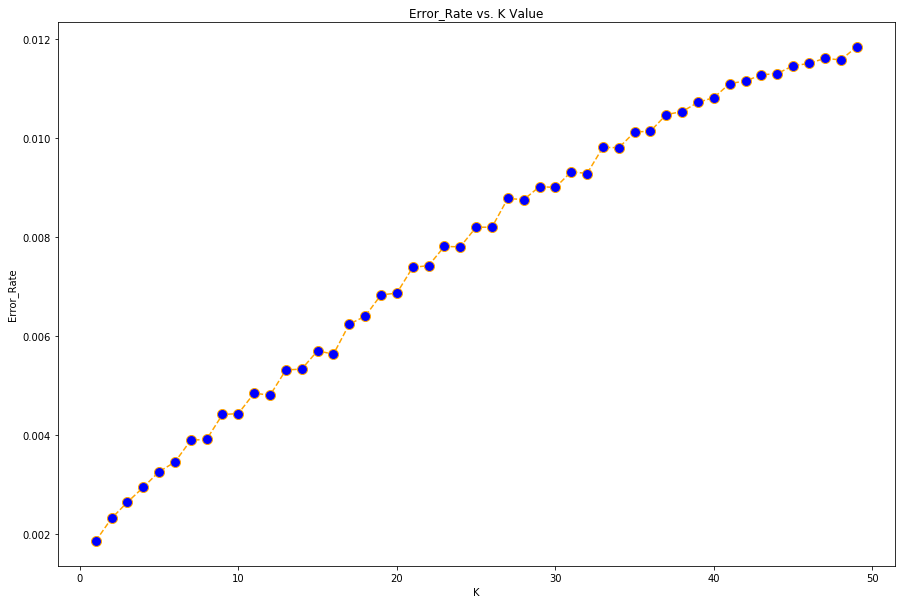

In [29]:
from pylab import rcParams
plt.plot(range(1,50),error_value,color='orange', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error_Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')
rcParams['figure.figsize'] = 15,10

## The above graph shows the K=1 as the best value with minimum error rate
### Choosing K value with odd number is wise as even number will end up in tie

In [24]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
y_pred_2 = KNN.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_2)
print('Test Accuracy:',accuracy)

Test Accuracy: 0.9982975495298414


In [25]:
train_acc=accuracy_score(y_train, KNN.predict(X_train))
print('Test Accuracy:',train_acc)

Test Accuracy: 0.9999810978375926


In [26]:
print(confusion_matrix(y_test,y_pred_2))

[[56432   145]
 [   65 56724]]


## The above confusion matrix improved in results when compared with K=5
### False negative and False positive value have been decreased

In [27]:
print(classification_report(y_test,y_pred_2,digits=3))

              precision    recall  f1-score   support

           0      0.999     0.997     0.998     56577
           1      0.997     0.999     0.998     56789

    accuracy                          0.998    113366
   macro avg      0.998     0.998     0.998    113366
weighted avg      0.998     0.998     0.998    113366



## Plotting Precision - Recall curve 

In [30]:
#Average precision score evaluation on test and prediction results

from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, y_pred_2)
avg_precision

0.9968819751348265

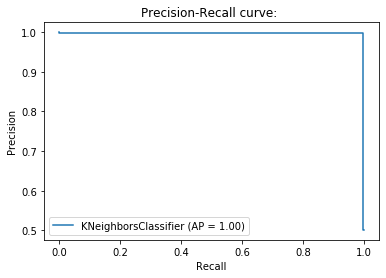

In [32]:
#Precision recall curve plotting by importing "plot_precision_recall_curve" library from sklearn
from pylab import rcParams
from sklearn.metrics import plot_precision_recall_curve

pr = plot_precision_recall_curve(KNN, X_test, y_test)
pr.ax_.set_title('Precision-Recall curve: '.format(avg_precision))
rcParams['figure.figsize'] = 8,5

## Plotting ROC AUC curve

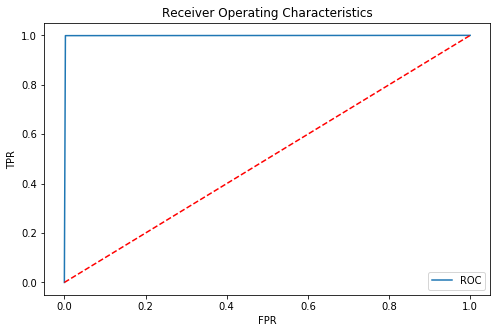

In [33]:
# calculate the fpr and tpr of the classification

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
prob = KNN.fit(X_train,y_train).predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = 'ROC')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()